In [43]:
# data
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1)
y = 2 * X + 1. + np.random.rand(100, 1)

X.shape, y.shape

((100, 1), (100, 1))

In [44]:
# Data split
X_train = X[:80]
y_train = y[:80]
X_test = X[80:]
y_test = y[80:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80, 1), (20, 1), (20, 1))

In [45]:
# Data Normalization


In [46]:
# libraries
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)
device = "cpu"

In [47]:
# Torch Dataset
from torch.utils.data import Dataset

class MyData(Dataset):
    def __init__(self, data, targets):
        self.data = torch.from_numpy(data).float()
        self.targets = torch.from_numpy(targets).float()
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        return (self.data[index], self.targets[index])
    
train_dataset = MyData(X_train, y_train)
display(len(train_dataset))
train_dataset[7]

80

(tensor([0.6177]), tensor([3.1353]))

In [48]:
# Train/Validation split
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(train_dataset, [60, 20])
len(train_dataset), len(val_dataset)

(60, 20)

In [49]:
# Torch DataLoader
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_dataset, batch_size = 20)
val_loader = DataLoader(dataset = val_dataset, batch_size = 5)
len(train_loader), len(val_loader)

(3, 4)

In [50]:
# Model
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.neuron = nn.Linear(1,1)
        
    def forward(self, x):
        out = self.neuron(x)
        return out

In [53]:
# Training Model v.1

model = Mymodel().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

n_epochs = 5
train_losses = []
val_losses = []
# Training loop
# Training iteration
for e in range(n_epochs):
    
    model.train()
    loss_train = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        
        loss_train = loss_train + loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    loss_train = loss_train / len(train_loader)  # average of the losses for an epoch
    train_losses.append(loss_train)
    
    # Validation Loop
    model.eval()
    loss_val = 0
    
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        
        loss_val = loss_val + loss.item()
    
    loss_val = loss_val / len(val_loader)
    val_losses.append(loss_val)
        
model.state_dict()


OrderedDict([('neuron.weight', tensor([[1.5307]])),
             ('neuron.bias', tensor([1.7136]))])

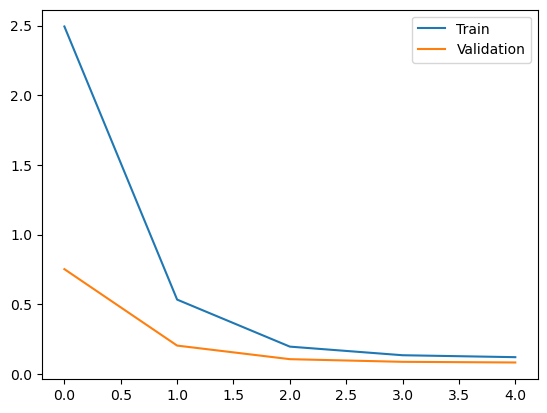

In [54]:
plt.plot(train_losses, label = "Train")
plt.plot(val_losses, label = "Validation")

plt.legend()
plt.show()